<h1> Week 8 Practicum</h1>

Didi Chang-Park

In [3]:
# import some things
import os
import pandas as pd
from textblob import TextBlob
pd.set_option("display.max_rows", 20)
import nltk

# Set text folder and metadata path
text_folder = '../corpora/peregrine'
path_to_metadata='../corpora/peregrine/peregrine.csv'

<h3>Set up dataframe </h3> 
<i>Load your metadata file as a pandas dataframe<br>
Show the metadata dataframe <br>
Make an empty "results" list <br>
Loop over your filename column, <br>
Get the full path to the text <br>
Open the text file <br>
Count the number of words in the text <br>
Make an empty "result_dict" dictionary <br>
Add the number of words to that dictionary <br>
Add the filename to that dictionary <br>
Load that results list into a dataframe <br>
Merge that dataframe with your metadata <br>
Show the merged dataframe </i>

In [4]:
# Get the metadata for this corpus
df_meta = pd.read_csv(path_to_metadata).set_index('fn')
df_meta

,season,author
fn,,
00_oct-1.txt,fall,baker
01_oct-3.txt,fall,baker
02_oct-5.txt,fall,baker
03_oct-7.txt,fall,baker
04_oct-8.txt,fall,baker
05_oct-9.txt,fall,baker
06_oct-12.txt,fall,baker
07_oct-14.txt,fall,baker
08_oct-15.txt,fall,baker


In [5]:
def make_dtm0(text_folder,n_top_words=5000,normalize=False):
    # get stopwords
    from nltk.corpus import stopwords
    stopwords=set(stopwords.words('english'))

    # make an empty results list
    all_results = []

    # make a count for all words
    from collections import Counter
    all_counts = Counter()

    # for each filename
    filenames=sorted(os.listdir(text_folder))
    for i,fn in enumerate(filenames):
        if not i%10: print('>> looping through #',i,'of',len(filenames),'files:',fn)
        # make sure is a text file
        if not fn.endswith('.txt'): continue
        
        # full path
        full_path = os.path.join(text_folder,fn)

        # open the file
        with open(full_path) as file:
            txt=file.read()

        # make a blob
        blob = TextBlob(txt.lower())

        # make a result dictionary
        text_result = {}

        # set the filename
        text_result['fn']=fn

        # loop over the word counts
        num_words = len(blob.words)
        text_result['num words'] = num_words
        # add results
        all_results.append(text_result)

    # Get columns
    columns=[]
    columns.append('fn')
    columns.append('num words')
    
    # Make dataframe
    df = pd.DataFrame(all_results, columns=columns).set_index('fn').fillna(0)
    
    # return dataframe
    return df

In [6]:
# Make the document term matrix
dtm0 = make_dtm0(text_folder,normalize=True)

>> looping through # 0 of 178 files: -51_jan-5.txt
>> looping through # 10 of 178 files: 08_oct-15.txt
>> looping through # 20 of 178 files: 18_nov-2.txt
>> looping through # 30 of 178 files: 28_nov-21.txt
>> looping through # 40 of 178 files: 38_dec-8.txt
>> looping through # 50 of 178 files: 48_dec-24.txt
>> looping through # 60 of 178 files: 58_feb-22.txt
>> looping through # 70 of 178 files: 68_mar-12.txt
>> looping through # 80 of 178 files: 78_mar-25.txt
>> looping through # 90 of 178 files: _01_oct-3.txt
>> looping through # 100 of 178 files: _11_oct-20.txt
>> looping through # 110 of 178 files: _21_nov-9.txt
>> looping through # 120 of 178 files: _31_nov-28.txt
>> looping through # 130 of 178 files: _41_dec-15.txt
>> looping through # 140 of 178 files: _51_jan-5.txt
>> looping through # 150 of 178 files: _61_mar-5.txt
>> looping through # 160 of 178 files: _71_mar-15.txt
>> looping through # 170 of 178 files: _81_mar-29.txt


In [7]:
# Add the metadata
dtm_meta0=df_meta.merge(dtm0,on='fn')
dtm_meta0

,season,author,num words
fn,,,
00_oct-1.txt,fall,baker,819
01_oct-3.txt,fall,baker,314
02_oct-5.txt,fall,baker,614
03_oct-7.txt,fall,baker,674
04_oct-8.txt,fall,baker,398
05_oct-9.txt,fall,baker,370
06_oct-12.txt,fall,baker,811
07_oct-14.txt,fall,baker,300
08_oct-15.txt,fall,baker,477


<h2> Practice Most Distinctive Words </h2> 

<i>Replicate the "difference of means" or "tf-idf" sections of the MDW notebook on your own corpus.
To do this, you'll need to make use of a column in your metadata that allows you to make comparisons between vocabulary usage: like a column for "political party", which allows us to ask for which words most distinguish Republican and Democrat presidents. If you don't yet have such a column, please work to create one before uploading your corpus.
Write a brief note, before you begin your analysis, about which words you would expect to distinguish your two groups. At the close of the notebook, please write a follow-up note describing how the data aligned or departed from your expectations. </i>

<h3> Hypotheses </h3>
I expect there to be more mentions of snow and ice in winter, and more mentions of tree, grass, and other kind of vegetation in the spring and fall. The seasons should also distinguish migratory birds. As J.A. Baker writes in the "Peregrines" section of the book, 

> More woodpigeons were killed during the winter I have described in this book, because of their extraordinary abundance in the cold weather, and because of the absence of other inland species at that time. The relative figures for this particular winter are as follows:
Woodpigeon – 54%  <br>
Black-headed gull – 9% <br>
Lapwing – 7% <br>
Wigeon – 3% <br>
Partridge – 3% <br>
Fieldfare – 2% <br>
Moorhen – 2% <br>
Curlew – 2% <br>
Rook – 2% <br>
Mallard – 2% <br>

Baker also mentions black-headed gulls as another popular winter prey. So we might expect to see both animals mentioned more frequently in the winter texts.


J.A. Baker also tells us that
> In early autumn, and in spring, when days are longer and the air warmer, the peregrine soars higher and hunts over a wider area. In March, when conditions are often ideal for soaring, his range increases, and by long stoops from a great height he is able to kill larger and heavier prey. Cloudy weather means shorter flights at lower levels. Rain curtails the hunting range still further. Fog reduces it to a single field. The shorter the day the more active the hawk, for there is less time available for hunting. All its activities contract or expand with the shortening or lengthening of days on either side of the winter solstice.

Therefore we can expect to see words like "soaring" and "circling," and other words related to high flight, in the fall and spring entries, and especially in March.

<h3> Difference of means </h3>

In [8]:
# Loop over each of the filenames

def make_dtm(text_folder,n_top_words=5000,normalize=False):
    # get stopwords
    from nltk.corpus import stopwords
    stopwords=set(stopwords.words('english'))

    # make an empty results list
    all_results = []

    # make a count for all words
    from collections import Counter
    all_counts = Counter()

    # for each filename
    filenames=sorted(os.listdir(text_folder))
    for i,fn in enumerate(filenames):
        if not i%10: print('>> looping through #',i,'of',len(filenames),'files:',fn)
        # make sure is a text file
        if not fn.endswith('.txt'): continue
        
        # full path
        full_path = os.path.join(text_folder,fn)

        # open the file
        with open(full_path) as file:
            txt=file.read()

        # make a blob
        blob = TextBlob(txt.lower())

        # make a result dictionary
        text_result = {}

        # set the filename
        text_result['fn']=fn

        # loop over the word counts
        num_words = len(blob.words)

        # for each word,count pair in the blob.word_counts dictionary...
        for word,count in blob.word_counts.items():
            # is the word in the stopwords?
            if word in stopwords: continue  

            # is the word a punctuation?
            if not word[0].isalpha(): continue
            
            # set the normalized version
            if normalize:
                # get the term frequency (count divided by number of words)
                tf = count / num_words

                # set the term frequency result to the key 'word' in the text_result dictionary
                text_result[word] = tf
            else:
                # set the count as a result
                text_result[word] = count

            # add the count to the dictionary of counts for all words
            all_counts[word]+=count

        # add results
        all_results.append(text_result)
    
    # Get the most frequent words
    most_common_words_plus_counts = all_counts.most_common(n_top_words)
    
    # Get only the words
    word_columns = []
    for word,count in most_common_words_plus_counts:
        word_columns.append(word)
    
    # Get columns
    columns=[]
    columns.append('fn')
    columns.extend(word_columns)
    
    # Make dataframe
    df = pd.DataFrame(all_results, columns=columns).set_index('fn').fillna(0)
    
    # return dataframe
    return df

In [9]:
# Make the document term matrix
dtm = make_dtm(text_folder,normalize=True)

>> looping through # 0 of 178 files: -51_jan-5.txt
>> looping through # 10 of 178 files: 08_oct-15.txt
>> looping through # 20 of 178 files: 18_nov-2.txt
>> looping through # 30 of 178 files: 28_nov-21.txt
>> looping through # 40 of 178 files: 38_dec-8.txt
>> looping through # 50 of 178 files: 48_dec-24.txt
>> looping through # 60 of 178 files: 58_feb-22.txt
>> looping through # 70 of 178 files: 68_mar-12.txt
>> looping through # 80 of 178 files: 78_mar-25.txt
>> looping through # 90 of 178 files: _01_oct-3.txt
>> looping through # 100 of 178 files: _11_oct-20.txt
>> looping through # 110 of 178 files: _21_nov-9.txt
>> looping through # 120 of 178 files: _31_nov-28.txt
>> looping through # 130 of 178 files: _41_dec-15.txt
>> looping through # 140 of 178 files: _51_jan-5.txt
>> looping through # 150 of 178 files: _61_mar-5.txt
>> looping through # 160 of 178 files: _71_mar-15.txt
>> looping through # 170 of 178 files: _81_mar-29.txt


In [16]:
# Add the metadata
dtm_meta=df_meta.merge(dtm,on='fn')
dtm_meta = dtm_meta.loc[dtm_meta["author"]=="markov"]

In [17]:
dtm_meta.groupby('season_x').mean()

,flew,like,hawk,wings,peregrine,sky,wind,away,sun,long,...,tumult,wing-beating,bearing,contentment,returns,favourite,obvious,approachable,pricking,sensation
season_x,,,,,,,,,,,,,,,,,,,,,
fall,0.007830,0.005496,0.006260,0.005957,0.005493,0.005346,0.004933,0.004956,0.004181,0.003744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
spring,0.007464,0.004474,0.004727,0.003574,0.005239,0.004772,0.005935,0.004884,0.003585,0.003971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
winter,0.007207,0.005493,0.006163,0.006499,0.005905,0.004193,0.004011,0.003682,0.004555,0.002927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
round(dtm_meta.groupby('season_x').mean().T * 1000,2)

season_x,fall,spring,winter
flew,7.83,7.46,7.21
like,5.50,4.47,5.49
hawk,6.26,4.73,6.16
wings,5.96,3.57,6.50
peregrine,5.49,5.24,5.91
sky,5.35,4.77,4.19
wind,4.93,5.93,4.01
away,4.96,4.88,3.68
sun,4.18,3.58,4.56
long,3.74,3.97,2.93


In [19]:
dtm_meta_T = dtm_meta.groupby('season_x').mean().T * 1000
dtm_meta_T

season_x,fall,spring,winter
flew,7.830015,7.464411,7.206762
like,5.495715,4.474312,5.492924
hawk,6.259951,4.726546,6.162655
wings,5.957208,3.573650,6.499149
peregrine,5.493366,5.238955,5.905472
sky,5.346362,4.772144,4.193396
wind,4.933073,5.934547,4.010689
away,4.956373,4.884232,3.681742
sun,4.181385,3.584977,4.555113
long,3.744104,3.971107,2.927138


In [21]:
dtm_meta_T['S-W']=dtm_meta_T['spring'] - dtm_meta_T['winter']
dtm_meta_T['S-F']=dtm_meta_T['spring'] - dtm_meta_T['fall']
dtm_meta_T['F-W']=dtm_meta_T['fall'] - dtm_meta_T['winter']

round(dtm_meta_T,2)

season_x,fall,spring,winter,S-W,S-F,F-W
flew,7.83,7.46,7.21,0.26,-0.37,0.62
like,5.50,4.47,5.49,-1.02,-1.02,0.00
hawk,6.26,4.73,6.16,-1.44,-1.53,0.10
wings,5.96,3.57,6.50,-2.93,-2.38,-0.54
peregrine,5.49,5.24,5.91,-0.67,-0.25,-0.41
sky,5.35,4.77,4.19,0.58,-0.57,1.15
wind,4.93,5.93,4.01,1.92,1.00,0.92
away,4.96,4.88,3.68,1.20,-0.07,1.27
sun,4.18,3.58,4.56,-0.97,-0.60,-0.37
long,3.74,3.97,2.93,1.04,0.23,0.82


<h4>Comment</h4>

We can see here that the words "air," "dark," "grass," "green," "upon," "heat," and "leaves" appear more often in the summer texts, while "snow," "peregrine," "flew," "hawk," "ice," "woodpigeons," "fields," brook," "three," and "mud," etc. appear more often in the winter chapters.

Some of this might be attributed to the fact that <i>The Hill of Summer</i> is not predominantly focused on peregrines and other birds of prey. The other seasonal references to vegetation or heat vs. cold are to be expected. That leaves "three" and "upon" as a bit unexpected... I can't really explain why these differences are the case when I look at the texts.

In [23]:
round(dtm_meta_T.sort_values('S-W'),2)

season_x,fall,spring,winter,S-W,S-F,F-W
wings,5.96,3.57,6.50,-2.93,-2.38,-0.54
still,1.91,1.96,3.75,-1.79,0.04,-1.84
south,2.77,2.82,4.56,-1.74,0.05,-1.79
wood,1.77,1.36,2.92,-1.57,-0.41,-1.15
hawk,6.26,4.73,6.16,-1.44,-1.53,0.10
snow,0.77,1.05,2.46,-1.41,0.28,-1.69
two,2.69,1.75,3.13,-1.38,-0.94,-0.44
north,2.66,1.74,2.99,-1.24,-0.92,-0.33
woods,0.98,0.81,2.04,-1.23,-0.16,-1.06
feeding,0.89,0.63,1.82,-1.19,-0.26,-0.93


<h4>Comment</h4>
The seasonal differences are present here with "snow," "ice," "woodpigeons," and "frozen" predominating in winter and not in fall, but there are less obvious differences as well: why more "brook" in winter and more "river" in fall? Why is there more "sun" in winter? And why does "across" distinguish fall most from winter? Though the uses of "across" vary widely within the fall chapters, it seems to conceptually embody the liminality of the season... the flow of the "river" conveys something similar, while the smaller, perhaps largely frozen brook conjures something more precise and narrow, given to the hardness and crispness of ice or snow. The sun is easy to understand; the whiteness of winter secenery reflects the brilliance of the sun more readily than any other season. Not to mention the more dramatic sunsets and sunrises of the darker months.

In [24]:
round(dtm_meta_T.sort_values('F-W'),2)

season_x,fall,spring,winter,S-W,S-F,F-W
warm,2.12,3.18,4.02,-0.84,1.06,-1.91
still,1.91,1.96,3.75,-1.79,0.04,-1.84
south,2.77,2.82,4.56,-1.74,0.05,-1.79
snow,0.77,1.05,2.46,-1.41,0.28,-1.69
brook,1.36,1.92,2.60,-0.68,0.56,-1.24
woodpigeon,0.02,0.34,1.22,-0.88,0.33,-1.21
tree,1.25,2.30,2.46,-0.16,1.05,-1.21
wood,1.77,1.36,2.92,-1.57,-0.41,-1.15
woods,0.98,0.81,2.04,-1.23,-0.16,-1.06
woodpigeons,1.01,0.94,2.06,-1.13,-0.08,-1.05


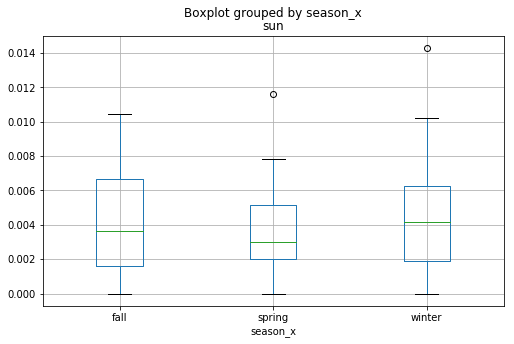

In [26]:
dtm_meta.boxplot('sun',by='season_x',figsize=(8,5))

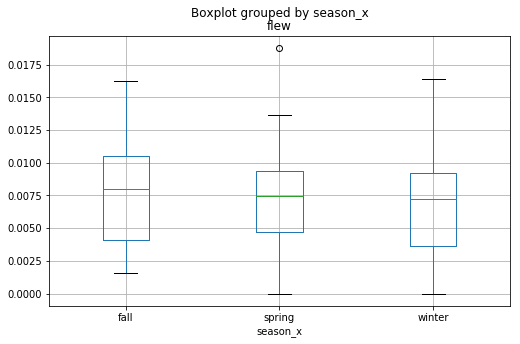

In [27]:
dtm_meta.boxplot('flew',by='season_x',figsize=(8,5))

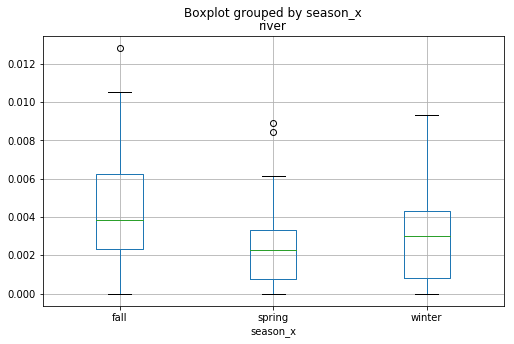

In [28]:
dtm_meta.boxplot('river',by='season_x',figsize=(8,5))

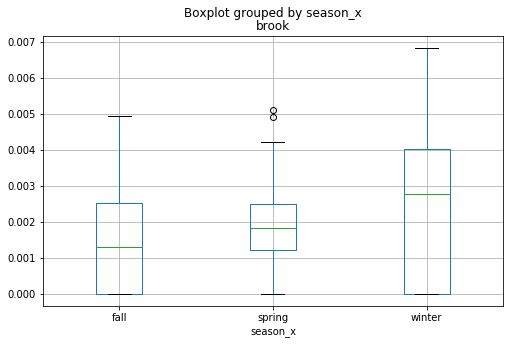

In [29]:
dtm_meta.boxplot('brook',by='season_x',figsize=(8,5))

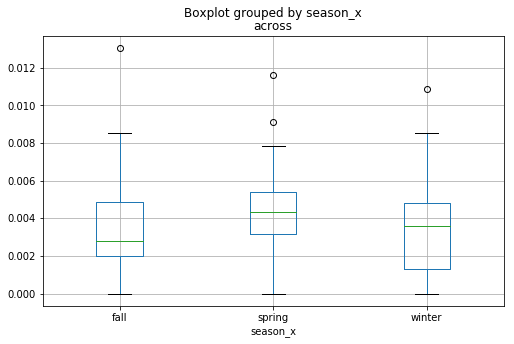

In [30]:
dtm_meta.boxplot('across',by='season_x',figsize=(8,5))

The boxplots conform with some of the observations in the comments above.
Interestingly enough "across" appears quite frequently in spring as well, and less in both the summer and winter months. The migratory motions, and other kinds of transitional moments, are no doubt more common in the spring and fall seasons.

<h3> TF-IDF </h3>

In [43]:
# set a given word?
given_word='across'

In [44]:
# We already have that calculated here:
tf_series = dtm[given_word]
tf_series.sort_values(ascending=False)

fn
nov-9.txt     0.010471
apr-2.txt     0.009050
mar-31.txt    0.008078
mar-22.txt    0.007732
oct-8.txt     0.007538
nov-2.txt     0.006780
mar-10.txt    0.005747
nov-6.txt     0.005626
mar-9.txt     0.005102
dec-27.txt    0.005013
                ...   
nov-13.txt    0.000000
oct-23.txt    0.000000
oct-24.txt    0.000000
dec-29.txt    0.000000
dec-3.txt     0.000000
dec-5.txt     0.000000
dec-8.txt     0.000000
jan-18.txt    0.000000
feb-17.txt    0.000000
jan-5.txt     0.000000
Name: across, Length: 114, dtype: float64

In [45]:
# Get the number of documents
num_docs = len(dtm)
num_docs

114

In [46]:
# Get the number of documents a given word appears
dtm[dtm[given_word]>0][given_word]

fn
apr-2.txt               0.009050
apr-3.txt               0.003717
apr-4.txt               0.002257
apr.txt                 0.004215
dec-1.txt               0.001280
dec-10.txt              0.001805
dec-12.txt              0.000751
dec-15.txt              0.001083
dec-21.txt              0.001513
dec-22.txt              0.004197
                          ...   
oct-28.txt              0.002558
oct-29.txt              0.002398
oct-3.txt               0.003185
oct-30.txt              0.002591
oct-7.txt               0.002967
oct-8.txt               0.007538
oct-9.txt               0.002703
oct-nov.txt             0.002826
oct.txt                 0.002267
the-hunting-life.txt    0.002346
Name: across, Length: 89, dtype: float64

In [47]:
num_docs_with_word=len(dtm[dtm[given_word]>0])

In [48]:
import numpy as np
idf = np.log(num_docs/num_docs_with_word)
idf

0.24756207866235563

In [49]:
tfidf_series = tf_series * idf
tfidf_series.sort_values(ascending=False)

fn
nov-9.txt     0.002592
apr-2.txt     0.002240
mar-31.txt    0.002000
mar-22.txt    0.001914
oct-8.txt     0.001866
nov-2.txt     0.001678
mar-10.txt    0.001423
nov-6.txt     0.001393
mar-9.txt     0.001263
dec-27.txt    0.001241
                ...   
nov-13.txt    0.000000
oct-23.txt    0.000000
oct-24.txt    0.000000
dec-29.txt    0.000000
dec-3.txt     0.000000
dec-5.txt     0.000000
dec-8.txt     0.000000
jan-18.txt    0.000000
feb-17.txt    0.000000
jan-5.txt     0.000000
Name: across, Length: 114, dtype: float64

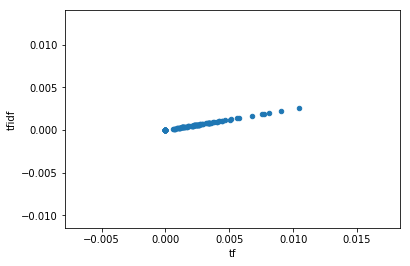

In [50]:
pd.DataFrame({'tfidf':tfidf_series, 'tf':tf_series}).plot(x='tf',y='tfidf',kind='scatter')

In [51]:
# make
def to_tfidf(dtm):
    # list of dictionaries
    dtm_tfidf = pd.DataFrame()
    
    for word in dtm.columns:
        # tf
        tf_series = dtm[word]
        
        # idf
        num_docs = len(dtm)
        num_docs_with_word=len(dtm[dtm[word]>0])
        idf=np.log(num_docs/num_docs_with_word)
        
        # tfidf
        tfidf_series = tf_series * idf
        dtm_tfidf[word]=tfidf_series
    
    return dtm_tfidf

In [52]:
dtm_tfidf=to_tfidf(dtm)
dtm_tfidf

,like,wings,sky,hawk,flew,air,white,away,sun,dark,...,spatters,healed,flecks,swans,impression,loosestrife,smoulders,martin,backwater,whang
fn,,,,,,,,,,,,,,,,,,,,,
apr-2.txt,0.000558,0.000731,0.000000,0.000000,0.000000,0.000830,0.000664,0.001020,0.000000,0.000745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
apr-3.txt,0.000611,0.000400,0.000558,0.000279,0.001201,0.000000,0.000000,0.001396,0.000642,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
apr-4.txt,0.000186,0.000547,0.001272,0.001526,0.000547,0.000000,0.000994,0.001017,0.000000,0.001116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
apr.txt,0.000424,0.000529,0.000739,0.000739,0.000681,0.000172,0.000550,0.001161,0.000242,0.000617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dec-1.txt,0.000526,0.001034,0.001443,0.000577,0.001447,0.001409,0.000752,0.001154,0.000994,0.000844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dec-10.txt,0.001336,0.000000,0.000813,0.001220,0.001166,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dec-12.txt,0.000494,0.001213,0.000339,0.001693,0.001456,0.001102,0.000441,0.000508,0.000194,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dec-15.txt,0.000802,0.001400,0.001221,0.001709,0.001050,0.002384,0.000954,0.000488,0.000000,0.001785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dec-17.txt,0.000515,0.001213,0.001410,0.001128,0.000808,0.002295,0.002204,0.000282,0.002592,0.000412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
word='across'
dtm[word].nlargest(10)

fn
nov-9.txt     0.010471
apr-2.txt     0.009050
mar-31.txt    0.008078
mar-22.txt    0.007732
oct-8.txt     0.007538
nov-2.txt     0.006780
mar-10.txt    0.005747
nov-6.txt     0.005626
mar-9.txt     0.005102
dec-27.txt    0.005013
Name: across, dtype: float64

In [54]:
dtm_tfidf[word].nlargest(10)

fn
nov-9.txt     0.002592
apr-2.txt     0.002240
mar-31.txt    0.002000
mar-22.txt    0.001914
oct-8.txt     0.001866
nov-2.txt     0.001678
mar-10.txt    0.001423
nov-6.txt     0.001393
mar-9.txt     0.001263
dec-27.txt    0.001241
Name: across, dtype: float64

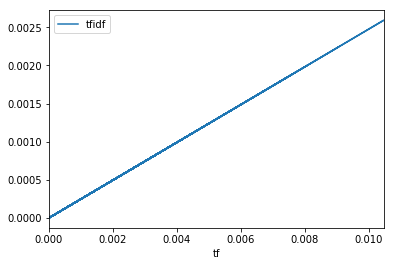

In [55]:
pd.DataFrame({'tf':dtm[word], 'tfidf':dtm_tfidf[word]}).plot(x='tf',y='tfidf')

In [56]:
fn='nov-9.txt'
dtm_tfidf.loc[fn].nlargest(10)

fear          0.016891
taken         0.012242
surprise      0.010914
magpie        0.008162
gull          0.007944
dunlin        0.006075
helmet        0.005457
careful       0.005457
zigzagging    0.005457
flocks        0.005296
Name: nov-9.txt, dtype: float64

In [57]:
dtm.loc[fn].nlargest(10)

fear         0.013962
across       0.010471
hawk         0.008726
like         0.006981
sky          0.006981
flew         0.006981
wings        0.005236
white        0.005236
peregrine    0.005236
gull         0.005236
Name: nov-9.txt, dtype: float64

The results are quite different between the difference of means and TF-IDF methods.  
I'd say that the words given by TF-IDF are indeed more distinctive to the november 9th text.

In [59]:
fn='hill.txt'
dtm_tfidf.loc[fn].nlargest(10)

wood        0.002284
seems       0.002107
leaves      0.002029
song        0.001843
bracken     0.001803
heat        0.001771
green       0.001750
sound       0.001734
darkness    0.001728
shrike      0.001682
Name: hill.txt, dtype: float64

<i>The Hill of Summer</i> has a more woody, leafy, lush, atmosphere, with less motion perhaps.  

In [60]:
fn='the-hunting-life.txt'
dtm_tfidf.loc[fn].nlargest(10)

snow        0.001749
march       0.001490
orchard     0.001484
december    0.001214
october     0.001214
falcon      0.001207
brook       0.001200
river       0.001199
gulls       0.001169
tiercel     0.001166
Name: the-hunting-life.txt, dtype: float64

<i>The Hunting Life</i> is dominated by the winter atmosphere, the presence of the river/brook, and the various hunting birds and their prey.

In [35]:
n_words = 10
for index in reversed(dtm_tfidf.index):
    # get row for this index
    row=dtm_tfidf.loc[index]
    
    # get the lagest words
    top_words_series=row.nlargest(n_words)
    top_words_list=list(top_words_series.index)
    top_words_str=', '.join(top_words_list)
    
    # print
    print('##',index.upper())
    print(top_words_str)
    print()

## THE-HUNTING-LIFE.TXT
snow, march, orchard, december, october, falcon, brook, river, gulls, tiercel

## OCT.TXT
waders, crows, starlings, inland, plough, river, gulls, dunlin, airk, field

## OCT-NOV.TXT
waders, starlings, river, gulls, plover, crows, inland, falcon, stubble, lapwings

## OCT-9.TXT
fog, learnt, jays, mobbed, eight, acorn, meat, breeding, flamed, acrid

## OCT-8.TXT
airk, waders, inland, turnstones, dunlin, walked, rained, long-billed, frieze, flapping

## OCT-7.TXT
length, tern, cars, peregrines, teeth, gave, eating, twice, falcon, hands

## OCT-5.TXT
kestrel, orchard, stubble, partridges, deepening, spiral, strike, brook, curlew, gale

## OCT-30.TXT
loneliness, desolation, stubbled, lanes, elms, lived, explosive, leaves, greasy, swan

## OCT-3.TXT
beach, waders, sanderling, beaches, sea, faced, inland, flashing, tide, breeze

## OCT-29.TXT
crows, plough, starlings, river-bank, spend, arrowed, black-brown, grin, spoor, mounted

## OCT-28.TXT
inland, woodcock, smell, 

I like the fact that TF-IDF gives a pretty even mix of truly distinctive words which I may not have highlighted on my own and more predictable words pertaining to weather and seasonality. Depending on the resolution of the text (size) one can find more obscure entities in each date entry or terms of more general interest such as "across" or "river." It's interesting to track how certain words persist in larger text sizes while others fade out. "Cotswold" in dec-22.txt shows up five times in that text, but nowhere else, so it is naturally not part of the dec.txt most-distinctive-words.

<h3> Going forward... </h3>
<i>Write a paragraph about your research plans for the remainder of the course.
What are you hoping to accomplish in your final project?
Which research question(s) are guiding you?
Now that we have a better sense of what's possible, what findings and visualizations are you hoping to produce?
What do you hope to accomplish next week as we work on our projects in class?
(Answering these questions will help us be maximally productive next week.)</i>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    Clearly I've changed my corpus once again, but I think this has been a good decision. I feel like each date entry from <i>The Hunting Life</i> (first published in 1967 in <i>The Peregrine</i>) forms a discrete unit of analysis which holds on its own and can be linked in interesting ways to others. Having <i>The Hill of Summer</i> (1969) to compare it to allows me to see differences not only between the warmer and cooler seasons, but the differences between a text preoccupied with the peregrine falcon and another more generally interested in the natural landscape. I'm broadly hoping that observing the texts using computational methods will give me ways of easily identifying general patterns and preoccupations of the texts while also allowing me to see how the most distinctive and specific instances of poetic language interact with those broader themes. One way I hope to do this is by making networks around specific key words, such as the various bird species, or distinctive terms like "across." Making networks for two terms might serve as a kind of lexical venn diagram or visual thesaurus (example below).

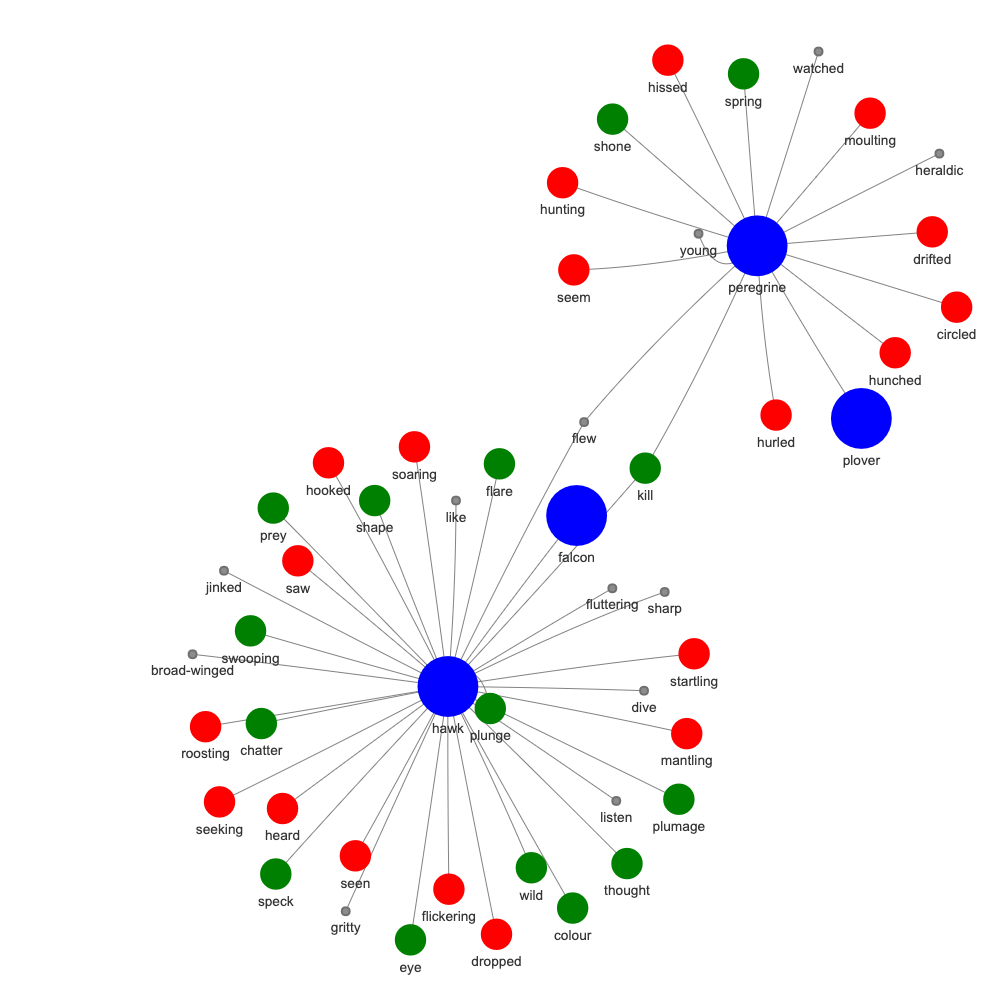

In [73]:
from IPython.display import Image
Image("./download.png", width=500)

More fundamentally however, I want to understand how similes play out in the text, and am working on network visualizations which use "like" or "as" as edges. The underlying question being, **what makes the similes in Baker's writing so powerful?** Metaphor is generally considered to be the more powerful trope in literary texts, yet somehow the similes here have their own charisma. I observe from the concordance below that the similes tend to involve more unusual terms and phrases, "he glowed purple and grey like broccoli, in the white field" being one striking example. The use of hyphenated words is also significant and interesting; perhaps those compound words are in fact doing another level of metaphorical work, as in the "cat-thin skirling, like a speeded-up recording of the song of a nightjar." These are pretty dense and lengthy similes, which give me a good motivation for putting them into networks. The question of how to do this will be of scale (i.e. how to visualize a smaller text vs a larger amalgamation of texts), of how to slice out the noise and choose the right data to visualize. Once I can find some really interesting networks, I need to translate them into other scales and domains and see how well the networks I make can be summarized quantitatively by certain graph metrics. Ideally, I will be able to make good networks for individual texts but also for larger ones, and will find numerical formulae for speaking concisely about how these networks change between scales and between texts.

In [62]:
def concordance(text_folder,filename,word,width=100,lines=1000):
    # Get the path
    text_path = os.path.join(text_folder, filename)
    print(text_path)

    # Open the file
    with open(text_path) as file:
        text_txt=file.read()

    # make nltk version of the text (useful for concordance)
    import nltk
    text_words = nltk.word_tokenize(text_txt)
    text_nltk = nltk.text.Text(text_words)

    # get concordance
    text_nltk.concordance(word,width=width,lines=lines)
    

In [63]:
concordance(text_folder,'dec.txt',"like")

../corpora/peregrine/dec.txt
Displaying 93 of 93 matches:
winked madly in the sun . Coot huddled together like winkles on a plate . Drake smew , their phantom
 curled about with thin black veins , sank deep like ice-floes or dazzled up the sky like flying sno
 sank deep like ice-floes or dazzled up the sky like flying snow . I did not see a peregrine , thoug
f flesh . What was left smelt fresh and sweet , like a mash of raw beef and pineapple . It was an ap
ungry . The day hardened in the easterly gale , like a flawless crystal . Columns of sunlight floate
h its bill if you reach down to it as it floats like a log in the tide . A poisoned crow , gaping an
f death . We carry it with us . It sticks to us like frost . We can not tear it away . At midday the
is bill gaping open . He glowed purple and grey like broccoli , in the white field . I went down int
 of dusk flickered across the barred sunlight , like the shadow of something higher . Thirty yards a
ugh the colour of the memory will